In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
dataset_original =  pd.read_csv("./datos/competencia_03.csv.gz")

In [4]:
#dataset = dataset_original.copy()
meses_usar = [201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202012, 202101, 202102, 202103, 202106, 202107, 202109]
dataset = dataset_original[dataset_original['foto_mes'].isin(meses_usar)]
#dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
#dataset = dataset_original.copy()

In [5]:
dataset.set_index('foto_mes', inplace=True)

In [6]:
#df_roto_cero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
#df_roto_cero_null = df_roto_cero_null[df_roto_cero_null.columns[df_roto_cero_null.eq(100).any()]].stack().reset_index()
#df_roto_cero_null.columns = ['foto_mes', 'columna', 'porcentagem']
#df_roto_cero_null = df_roto_cero_null[df_roto_cero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [7]:
df_roto_cero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_cero = df_roto_cero_bruto[df_roto_cero_bruto.columns[df_roto_cero_bruto.eq(100).any()]].stack().reset_index()
df_roto_cero.columns = ['foto_mes', 'columna', 'porcentagem']
df_roto_cero = df_roto_cero[df_roto_cero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [8]:
#df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
#df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
#df_roto_null.columns = ['foto_mes', 'columna', 'porcentagem']
#df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [9]:
#count_df_roto_cero_null = df_roto_cero_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero_null, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores Nulos ou cero por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(count_df_roto_cero_null['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_26556\979044820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')


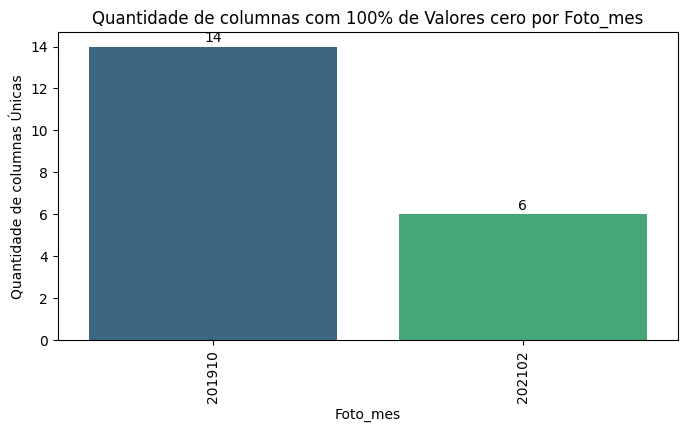

In [10]:
count_df_roto_cero = df_roto_cero.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_cero, palette='viridis')
plt.title('Quantidade de columnas com 100% de Valores cero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de columnas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_cero['quantidade_columnas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [11]:
#count_df_roto_null = df_roto_null.groupby('foto_mes')['columna'].nunique().reset_index(name='quantidade_columnas')
#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=count_df_roto_null, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores nulos por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(count_df_roto_null['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

In [12]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

#merged_df = pd.merge(count_df_roto_cero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_cero', '_null'))
#merged_df = merged_df.fillna(0)
#merged_df['quantidade_columnas'] =  merged_df['quantidade_columnas_cero'] - merged_df['quantidade_columnas_null']

In [13]:

#plt.figure(figsize=(8, 4))
#sns.barplot(x='foto_mes', y='quantidade_columnas', data=merged_df, palette='viridis')
#plt.title('Quantidade de columnas com 100% de Valores nulos e zerados por Foto_mes')
#plt.xlabel('Foto_mes')
#plt.ylabel('Quantidade de columnas Únicas')
#plt.xticks(rotation='vertical')
#for index, value in enumerate(merged_df['quantidade_columnas']):
#    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
#plt.show()

In [14]:
columnas_imputar = df_roto_cero['columna'].unique()

In [15]:
dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)

C:\Users\maico\AppData\Local\Temp\ipykernel_26556\2732953549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnas_imputar] = dataset[columnas_imputar].replace(0, np.nan)


In [16]:
dataset[columnas_imputar].isna().sum()   

mrentabilidad                   141652
chomebanking_transacciones      642876
mcomisiones_otras               193722
ccomisiones_otras               193642
mtarjeta_master_descuentos     2197149
mtarjeta_visa_descuentos       2135701
ctarjeta_visa_descuentos       2076249
ctarjeta_master_descuentos     2160794
ccajeros_propios_descuentos    2144741
mpasivos_margen                 162045
mactivos_margen                 228023
mcomisiones                     193932
mrentabilidad_annual            140922
mcajeros_propios_descuentos    2159450
dtype: int64

In [17]:
#dataset_imputar = dataset.copy()
dataset_lightgbm = dataset.copy()

In [18]:
#dataset_imputar[columnas_imputar].isna().sum()

mrentabilidad                   141652
chomebanking_transacciones      642876
mcomisiones_otras               193722
ccomisiones_otras               193642
mtarjeta_master_descuentos     2197149
mtarjeta_visa_descuentos       2135701
ctarjeta_visa_descuentos       2076249
ctarjeta_master_descuentos     2160794
ccajeros_propios_descuentos    2144741
mpasivos_margen                 162045
mactivos_margen                 228023
mcomisiones                     193932
mrentabilidad_annual            140922
mcajeros_propios_descuentos    2159450
dtype: int64

In [19]:
#dataset_imputar[columnas_imputar] = dataset_imputar[columnas_imputar].replace(0, np.nan)

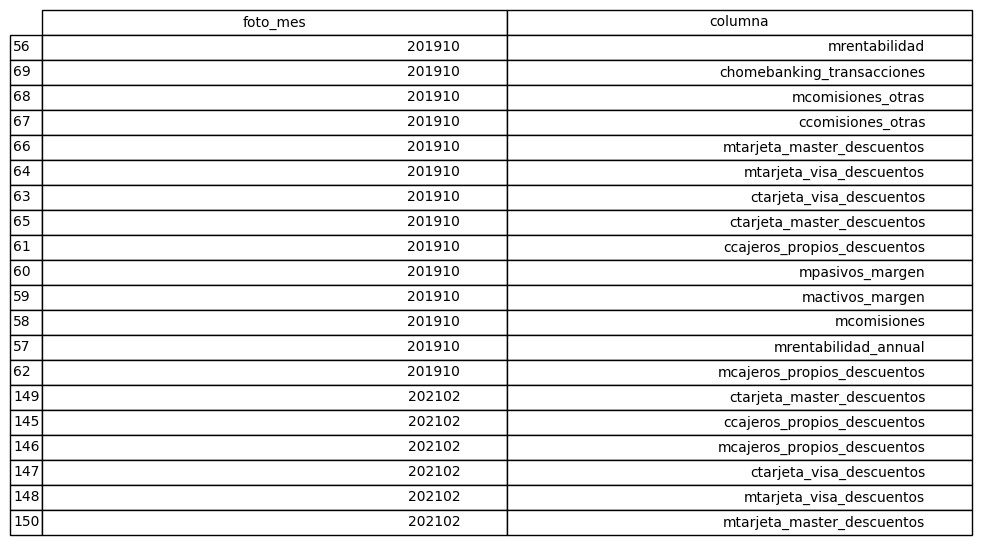

In [20]:
df_selecionado = df_roto_cero.drop(columns='porcentagem')
df_selecionado = df_selecionado.rename(columns={'columna': 'columna'})

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_selecionado, loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  # Ajusta a escala da tabela

plt.savefig('tabela_exportada.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [22]:
#dataset_imputar[columnas_imputar].mean()
#dataset_imputar.sort_values(by=['numero_de_cliente', 'foto_mes'], inplace=True)

#dataset_inputado_media_cliente = dataset_imputar.copy()
#dataset_inputado_mediana_cliente = dataset_imputar.copy()

#dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.mean()))
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.median()))


In [23]:
#dataset_inputado_media_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).mean()))

In [24]:
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_imputar.groupby('numero_de_cliente')[columnas_imputar].transform(lambda x: x.fillna(x.tail(3).median()))

In [25]:
#dataset_inputado_media_cliente[columnas_imputar] = dataset_inputado_media_cliente[columnas_imputar].fillna(0)
#dataset_inputado_mediana_cliente[columnas_imputar] = dataset_inputado_mediana_cliente[columnas_imputar].fillna(0)

In [26]:
dataset[columnas_imputar].describe()

,mrentabilidad,chomebanking_transacciones,mcomisiones_otras,ccomisiones_otras,mtarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccajeros_propios_descuentos,mpasivos_margen,mactivos_margen,mcomisiones,mrentabilidad_annual,mcajeros_propios_descuentos
count,2087016.000,1585792.000,2034946.000,2035026.000,31519.000,92967.000,152419.000,67874.000,83927.000,2066623.000,2000645.000,2034736.000,2087746.000,69218.000
mean,2617.714,50.858,1423.704,9.342,1112.056,1150.914,1.624,1.548,1.877,1913.981,-878.200,1417.235,29258.133,594.066
std,7665.025,75.452,3301.447,7.231,2116.029,2092.142,1.359,1.258,1.899,4864.424,3832.149,3283.818,66024.651,849.932
min,-473901.970,1.000,-137675.840,1.000,0.170,0.170,1.000,1.000,1.000,-51261.220,-458483.270,-137675.840,-1846421.630,-246.330
25%,254.650,6.000,297.390,6.000,207.440,216.060,1.000,1.000,1.000,315.240,-1551.530,296.590,6143.325,140.760
50%,1386.940,24.000,836.105,8.000,505.260,519.630,1.000,1.000,1.000,823.190,-480.240,833.605,16758.340,346.000
75%,3153.722,69.000,1748.900,12.000,1106.280,1287.110,2.000,2.000,2.000,1890.220,7.450,1745.680,34117.868,757.230
max,1958168.140,10387.000,1959169.310,263.000,71083.800,118224.210,57.000,40.000,44.000,667148.640,568198.100,1959169.310,11161405.720,53538.070


In [27]:
#dataset_inputado_media_cliente[columnas_imputar].describe()

,mrentabilidad,chomebanking_transacciones,mcomisiones_otras,ccomisiones_otras,mtarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccajeros_propios_descuentos,mpasivos_margen,mactivos_margen,mcomisiones,mrentabilidad_annual,mcajeros_propios_descuentos
count,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000
mean,2451.334,36.188,1299.951,8.531,15.727,48.009,0.111,0.047,0.071,1774.817,-788.348,1293.911,27408.098,18.451
std,7444.877,67.689,3180.095,7.394,283.839,485.318,0.543,0.345,0.513,4710.533,3640.561,3163.018,64298.664,181.813
min,-473901.970,0.000,-137675.840,0.000,0.000,0.000,0.000,0.000,0.000,-51261.220,-458483.270,-137675.840,-1846421.630,-246.330
25%,38.970,0.000,191.410,4.000,0.000,0.000,0.000,0.000,0.000,217.670,-1373.950,190.800,3935.347,0.000
50%,1227.980,8.000,700.575,8.000,0.000,0.000,0.000,0.000,0.000,726.480,-327.770,698.125,15231.370,0.000
75%,2964.113,46.000,1636.820,12.000,0.000,0.000,0.000,0.000,0.000,1753.983,0.000,1632.270,32274.285,0.000
max,1958168.140,10387.000,1959169.310,263.000,71083.800,118224.210,57.000,40.000,44.000,667148.640,568198.100,1959169.310,11161405.720,53538.070


In [28]:
#dataset_inputado_mediana_cliente[columnas_imputar].describe()

,mrentabilidad,chomebanking_transacciones,mcomisiones_otras,ccomisiones_otras,mtarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,ctarjeta_master_descuentos,ccajeros_propios_descuentos,mpasivos_margen,mactivos_margen,mcomisiones,mrentabilidad_annual,mcajeros_propios_descuentos
count,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000,2228668.000
mean,2451.334,36.188,1299.951,8.531,15.727,48.009,0.111,0.047,0.071,1774.817,-788.348,1293.911,27408.098,18.451
std,7444.877,67.689,3180.095,7.394,283.839,485.318,0.543,0.345,0.513,4710.533,3640.561,3163.018,64298.664,181.813
min,-473901.970,0.000,-137675.840,0.000,0.000,0.000,0.000,0.000,0.000,-51261.220,-458483.270,-137675.840,-1846421.630,-246.330
25%,38.970,0.000,191.410,4.000,0.000,0.000,0.000,0.000,0.000,217.670,-1373.950,190.800,3935.347,0.000
50%,1227.980,8.000,700.575,8.000,0.000,0.000,0.000,0.000,0.000,726.480,-327.770,698.125,15231.370,0.000
75%,2964.113,46.000,1636.820,12.000,0.000,0.000,0.000,0.000,0.000,1753.983,0.000,1632.270,32274.285,0.000
max,1958168.140,10387.000,1959169.310,263.000,71083.800,118224.210,57.000,40.000,44.000,667148.640,568198.100,1959169.310,11161405.720,53538.070


In [38]:
dataset_lightgbm.reset_index(inplace=True)
dataset_lightgbm.to_csv('./datos/dataset_lightgbm.csv.gz', index=False)